In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer



In [2]:
file_path = '/Users/jameskenny/Documents/GitHub/Ironhack_Labs/Week 4/marketing_customer_analysis_clean (1).csv'
df = pd.read_csv(file_path)


df.head()
df.dtypes

unnamed:_0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

Exercise 1.

Hint: use the file Data_Marketing_Customer_Analysis_Round3.csv

One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).
for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.
Exercise 2.

Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has a noticeably large skew. For example, you might select customer_lifetime_value as a candidate varB which has skew.

varA
Use minmax transform to bring varA's values into the range [0,1].
Check that varA has been rescaled using a displot or a histogram
varB
Use StandardScaler to standardize the variable or PowerTransform to reduce its skew.
Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.
Hints:

Import transformers from the sklearn library from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
To reduce the skew and standardize a column, PowerTransformer from sklearn has two options (box-cox and yeo-johnson)
To rescale the column, use the MinMaxScaler transform.
Format the column correctly for the transformer. The sklearn transformers expect numpy.ndarray object types as input. To take a pandas column and transform it into the correct form for PowerTransform and Minmax_Scaler use the to_numpy() and reshape(-1,1) methods.
(Optional Task)

check if there are highly correlated features and drop them (if there are any).

In [3]:
'''
Goal
One df with numerical

Categoricaldf  2 dis - ordinals(map or ordinal encoder) and nominals(one hot encoder-get dummies) 
pd.concat([nominal,ordinals])
'''

'\nGoal\nOne df with numerical\n\nCategoricaldf  2 dis - ordinals(map or ordinal encoder) and nominals(one hot encoder-get dummies) \npd.concat([nominal,ordinals])\n'

In [4]:
#Exercise 1 onehot/labbeling categorical data

#Splitting into cat and num
categoricals_df = df.select_dtypes(include='object')
numericals_df = df.select_dtypes(include='number')


In [5]:
nominals_df = categoricals_df[['state', 'response', 'employmentstatus','gender','location_code','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class','vehicle_type']]
ordinals_df = categoricals_df[['coverage', 'education', 'vehicle_size']]

In [6]:
#onehot for nominal variables
from sklearn.preprocessing import OneHotEncoder
import sklearn.preprocessing as sk

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoder.fit(nominals_df)
onehot_encoded = encoder.transform(nominals_df)

columns = encoder.get_feature_names_out(['state', 'response', 'employmentstatus','gender','location_code','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class','vehicle_type'])
onehot_encoded_w_n = pd.DataFrame(onehot_encoded, columns=columns)

/Users/jameskenny/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
onehot_encoded_w_n

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
10906,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10907,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10908,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [8]:
#labelling for ordinals
from sklearn.preprocessing import OrdinalEncoder



In [9]:
ordinals_df

,coverage,education,vehicle_size
0,Basic,College,Medsize
1,Basic,College,Medsize
2,Basic,Bachelor,Medsize
3,Extended,College,Medsize
4,Premium,Bachelor,Medsize
...,...,...,...
10905,Premium,Bachelor,Medsize
10906,Basic,College,Medsize
10907,Extended,Bachelor,Medsize
10908,Premium,College,Medsize


In [10]:
print(ordinals_df['coverage'].unique())
print(ordinals_df['education'].unique())
print(ordinals_df['vehicle_size'].unique())

['Basic' 'Extended' 'Premium']
['College' 'Bachelor' 'High School or Below' 'Doctor' 'Master']
['Medsize' 'Small' 'Large']


In [11]:
encoder_ord = OrdinalEncoder(categories=[['Basic', 'Extended', 'Premium'],
                                         ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor'],
                                         ['Small', 'Medsize', 'Large']])


In [12]:
encoder_ord.fit(ordinals_df)
ordinals_encoded = encoder_ord.transform(ordinals_df[['coverage', 'education', 'vehicle_size']])

columns_ord = encoder_ord.get_feature_names_out(['coverage', 'education', 'vehicle_size'])
ordinals_encoded_w_n = pd.DataFrame(ordinals_encoded, columns=columns_ord, index=ordinals_df.index)


ordinals_encoded_w_n.head()

,coverage,education,vehicle_size
0,0.0,1.0,1.0
1,0.0,1.0,1.0
2,0.0,2.0,1.0
3,1.0,1.0,1.0
4,2.0,2.0,1.0


In [13]:
#joining nominals and ordinals
categorical_encoded = pd.concat([onehot_encoded_w_n,ordinals_encoded_w_n], axis = 1)
categorical_encoded

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A,coverage,education,vehicle_size
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0
10906,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
10907,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
10908,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0


In [14]:
#Exercise 2
numericals_df.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556,0.498915
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5454.500000,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000,2.000000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


,income
0,48029
1,0
2,22139
3,49078
4,23675
...,...
10905,0
10906,61146
10907,39837
10908,64195


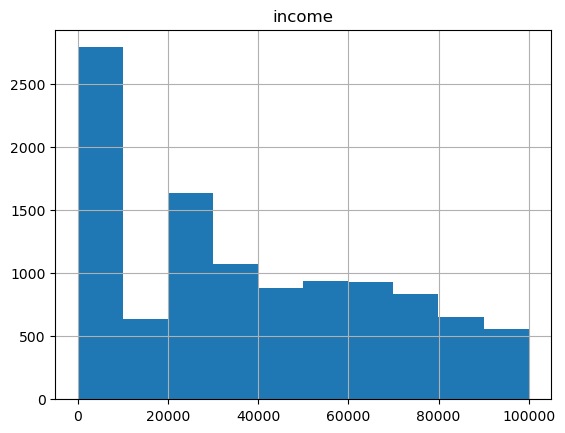

In [15]:
#Var A
var_a = numericals_df[["income"]]
var_a.hist()
type(var_a)
var_a


/var/folders/13/0nlynbg14s375y20r49pw4r40000gp/T/ipykernel_15066/1037436622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_a['minmax'] = scaler.fit_transform(var_a)


<Axes: >

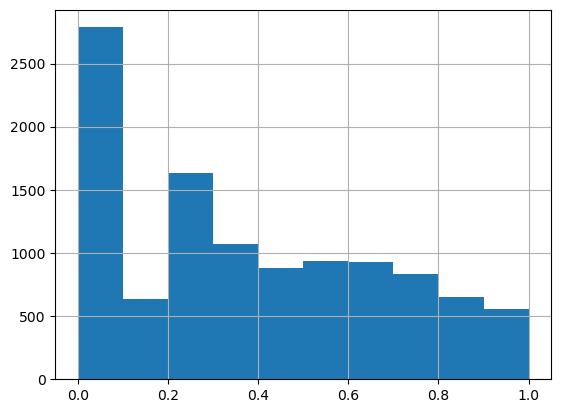

In [16]:
scaler = MinMaxScaler()
var_a['minmax'] = scaler.fit_transform(var_a)
var_a['minmax'].hist()

,customer_lifetime_value
count,10910.000000
mean,8018.241094
std,6885.081434
min,1898.007675
25%,4014.453113
50%,5771.147235
75%,8992.779137
max,83325.381190


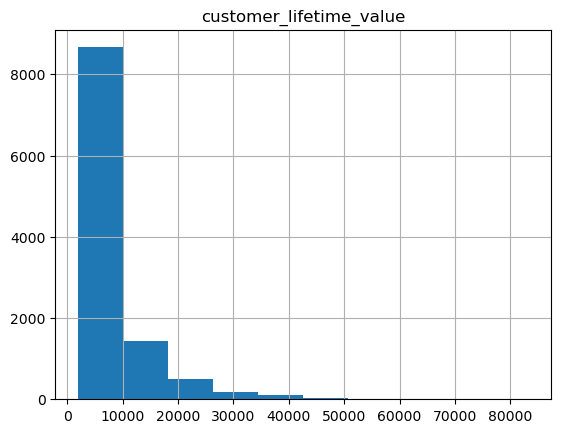

In [17]:
#Var B
#Use StandardScaler to standardize the variable or PowerTransform to reduce its skew.
#Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.


var_b = numericals_df[["customer_lifetime_value"]]
var_b.hist()

var_b.describe()

In [18]:
scaler_standard = StandardScaler()
var_b = pd.DataFrame(scaler_standard.fit_transform(var_b))


In [19]:
var_b.describe()


,0
count,1.091000e+04
mean,-1.426296e-16
std,1.000046e+00
min,-8.889530e-01
25%,-5.815431e-01
50%,-3.263864e-01
75%,1.415499e-01
max,1.093823e+01


In [20]:
import matplotlib.pyplot as plt
from scipy.stats import norm


In [26]:
pdf_values = norm.pdf(var_b, -1.426296e-16, 1.000046e+00)  # Mean = 0, Std = 1 for a standard normal distribution
pdf_values.hist()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

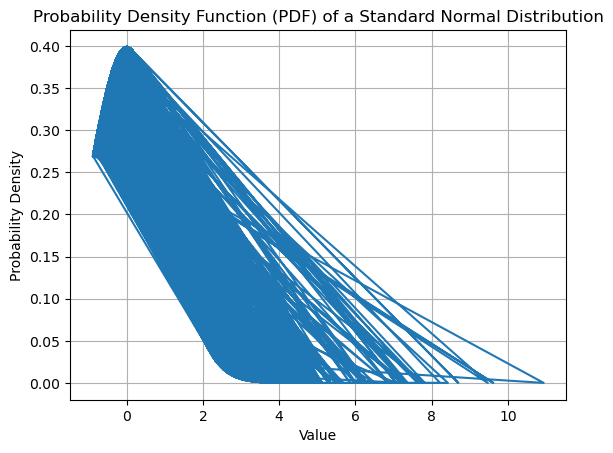

In [25]:
plt.plot(var_b, pdf_values)
plt.title('Probability Density Function (PDF) of a Standard Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True)

